# ESTRATEGIA LOW BETA

## Autor: Lucía Saiz Lapique

__Examen__

__Gestión de Activos y Carteras__

__CUNEF__

Esta estrategia de optimización de carteras es la estrategia Low Beta. A partir de los betas de esta estrategia, elegiremos a las empresas que tengan este valor más pequeño en comparación con las que si lo tengan más grande.
La beta es la sensibilidad al movimiento de un índice, haremos esta beta neutral cogiendo en igual cantidad la parte alcista y bajista. 

Esta estrategia realiza un ranking de todos los activos en función a las posiciones de cada uno a corto o largo plazo.
El objetivo no es solo optimizar las rentabilidades de las acciones seleccionadas, sino hacer pruebas a la hora de seleccionar una estrategia u otra. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

Importamos los datos que se desean analizar para nuestra cartera.

In [2]:
datos = pd.read_excel('datos_examen2.xlsx', sheet_name = 'Datos')
datos = datos.set_index('Name')
datos

,Symbol,Price,Currency,Sector,Country,OPER_MARGIN,RETURN_ON_INV_CAPITAL,ROC_WACC_RATIO,OPERATING_ROIC,OPER_INC_TO_TOT_DEBT,...,PX_TO_BOOK_RATIO,PX_TO_CASH_FLOW,EPS_GROWTH,DVD_PAYOUT_RATIO,EQY_REC_CONS,TOT_ANALYST_REC,TOT_BUY_REC,TOT_SELL_REC,TWITTER_SENTIMENT,NEWS_SENTIMENT
Name,,,,,,,,,,,,,,,,,,,,,
L'OREAL,OR FP Equity,269.700,EUR,Cosmetics/Personal Care,FRANCE,17.745099,11.919607,1.772554,17.325215,1.836388,...,5.11651,24.2592,-4.267845,63.253283,2.967742,31,7,8,-0.175997,0.441251
VINCI SA,DG FP Equity,90.320,EUR,Engineering&Construction,FRANCE,11.180850,7.025344,1.417503,10.390774,0.168256,...,2.45154,6.70978,9.293680,51.901082,3.760000,25,14,4,-0.151347,-0.070688
BANCO BILBAO VIZCAYA ARGENTA,BBVA SQ Equity,3.527,EUR,Banks,SPAIN,29.234690,2.635223,2.318590,2.221896,NaN,...,0.478253,NaN,-35.080363,49.270218,3.093750,32,11,9,0.021949,-0.471481
BANCO SANTANDER SA,SAN SQ Equity,2.527,EUR,Banks,SPAIN,23.411659,2.868100,2.262225,1.843059,NaN,...,0.435722,NaN,-17.593246,58.667174,3.562500,32,15,5,0.004102,-0.468159
ASML HOLDING NV,ASML NA Equity,320.500,EUR,Semiconductors,NETHERLANDS,23.610829,17.030943,1.282539,18.505194,0.841185,...,10.892,42.7511,0.983607,38.866863,3.951220,41,24,4,0.311931,0.311327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CISCO SYSTEMS INC,CSCO UW Equity,47.830,USD,Telecommunications,UNITED STATES,27.394806,18.245801,2.558312,24.375592,0.576462,...,5.65259,13.0481,13050.000000,51.449961,3.800000,30,14,2,-0.447240,0.311720
EXXON MOBIL CORP,XOM UN Equity,53.080,USD,Oil&Gas,UNITED STATES,4.511646,2.064358,0.208075,3.210000,0.219104,...,1.23255,8.19717,-31.147541,103.514644,2.785714,28,3,6,-0.103257,0.082322
WALGREENS BOOTS ALLIANCE INC,WBA UW Equity,45.350,USD,Retail,UNITED STATES,3.531922,12.450000,5.120000,6.200000,0.287123,...,1.68329,5.91757,-14.792899,41.145831,2.909091,22,1,2,-0.118059,-0.257975


In [3]:
datos.columns

Index(['Symbol', 'Price', 'Currency', 'Sector', 'Country', 'OPER_MARGIN',
       'RETURN_ON_INV_CAPITAL', 'ROC_WACC_RATIO', 'OPERATING_ROIC',
       'OPER_INC_TO_TOT_DEBT', 'CUR_MKT_CAP', 'PE_RATIO', 'PX_TO_BOOK_RATIO',
       'PX_TO_CASH_FLOW', 'EPS_GROWTH', 'DVD_PAYOUT_RATIO', 'EQY_REC_CONS',
       'TOT_ANALYST_REC', 'TOT_BUY_REC', 'TOT_SELL_REC', 'TWITTER_SENTIMENT',
       'NEWS_SENTIMENT'],
      dtype='object')

Importamos también, por separado, los datos históricos de cada activo.

In [4]:
historicos = pd.read_excel('datos_examen2.xlsx', sheet_name = 'Precios acciones')
historicos['Date'] = pd.to_datetime(historicos['Date'], format="%Y-%m-%d")
historicos = historicos.set_index('Date')
observacion = historicos.index >= dt.datetime(2015, 4, 30)
historicos = historicos[(observacion)]
historicos.head()

,L'OREAL,VINCI SA,BANCO BILBAO VIZCAYA ARGENTA,BANCO SANTANDER SA,ASML HOLDING NV,KONINKLIJKE PHILIPS NV,TELEFONICA SA,TOTAL SA,AIR LIQUIDE SA,AXA SA,...,MERCK & CO. INC.,INTEL CORP.1,RAYTHEON TECHNOLOGIES CORP,VERIZON COMMUNICATIONS INC,COCA-COLA CO/THE,CISCO SYSTEMS INC.1,EXXON MOBIL CORP,WALGREENS BOOTS ALLIANCE INC.1,PFIZER INC,DOW INC
Date,,,,,,,,,,,,,,,,,,,,,
2015-04-30,170.45,54.82,9.000,6.6449,96.71,25.655,13.640,48.485,94.0205,22.615,...,59.56,32.55,67.091,50.44,40.56,28.83,87.37,82.93,33.93,NaN
2015-05-01,170.45,54.82,9.000,6.6449,96.71,25.655,13.640,48.485,94.0205,22.615,...,59.86,33.42,68.088,50.41,40.91,29.13,88.85,83.46,34.08,NaN
2015-05-04,173.35,54.60,9.040,6.6380,96.78,25.440,13.765,48.130,95.4695,22.735,...,60.64,33.43,68.684,50.52,40.96,29.17,89.11,84.13,34.32,NaN
2015-05-05,166.70,53.76,8.825,6.4128,94.75,25.190,13.515,47.675,93.4168,22.275,...,60.49,32.64,67.870,50.09,40.75,28.89,88.61,83.14,34.12,NaN
2015-05-06,167.75,53.30,8.949,6.4816,93.67,25.080,13.520,47.845,93.9803,22.540,...,60.26,32.22,67.876,49.64,40.66,28.97,88.19,83.10,33.46,NaN


In [5]:
historicos.columns

Index(['L'OREAL', 'VINCI SA', 'BANCO BILBAO VIZCAYA ARGENTA',
       'BANCO SANTANDER SA', 'ASML HOLDING NV', 'KONINKLIJKE PHILIPS NV',
       'TELEFONICA SA', 'TOTAL SA', 'AIR LIQUIDE SA', 'AXA SA',
       ...
       'MERCK & CO. INC.', 'INTEL CORP.1', 'RAYTHEON TECHNOLOGIES CORP',
       'VERIZON COMMUNICATIONS INC', 'COCA-COLA CO/THE', 'CISCO SYSTEMS INC.1',
       'EXXON MOBIL CORP', 'WALGREENS BOOTS ALLIANCE INC.1', 'PFIZER INC',
       'DOW INC'],
      dtype='object', length=218)

In [6]:
indice = pd.read_excel('datos_examen2.xlsx', sheet_name = 'Precios Index')
indice['Date'] = pd.to_datetime(indice['Date'], format="%Y-%m-%d")
indice = indice.set_index('Date')
observacion = indice.index >= dt.datetime(2015, 4, 30)
indice = indice[(observacion)]
indice.head()

,Euro Stoxx 50 Pr,IBEX 35 INDEX,DOW JONES INDUS. AVG,MSCI WORLD,NASDAQ COMPOSITE INDEX,S&P 500 INDEX,NIKKEI 225,FTSE 100 INDEX
Date,,,,,,,,
2015-04-30,3615.59,11385.0,17840.52,1778.40,4941.424,2085.51,19520.01,6960.63
2015-05-01,3615.59,11385.0,18024.06,1787.40,5005.391,2108.29,19531.63,6985.95
2015-05-04,3632.94,11429.1,18070.40,1790.83,5016.929,2114.49,19531.63,6985.95
2015-05-05,3546.56,11115.6,17928.20,1773.42,4939.327,2089.46,19531.63,6927.58
2015-05-06,3558.03,11163.6,17841.98,1772.82,4919.645,2080.15,19531.63,6933.74


Calculamos el ratio de la beta a partir del índice de MSCI. Esto se obtiene calculando la covarianza entre las rentabilidades diarias de cada activo y el índice en cuestión.

In [7]:
historicos['MSCI'] = indice['MSCI WORLD']

In [8]:
rentabilidades_total = historicos.pct_change().dropna()

In [9]:
beta = rentabilidades_total.cov().div(rentabilidades_total.var())

In [10]:
betas = pd.DataFrame(beta.iloc[:-1,-1])
betas.columns = ['Low_Beta']
betas

,Low_Beta
L'OREAL,0.676154
VINCI SA,1.253872
BANCO BILBAO VIZCAYA ARGENTA,1.199413
BANCO SANTANDER SA,1.117905
ASML HOLDING NV,0.786964
...,...
CISCO SYSTEMS INC.1,1.118497
EXXON MOBIL CORP,1.311083
WALGREENS BOOTS ALLIANCE INC.1,0.891000
PFIZER INC,0.761749


In [11]:
ranking = betas.rank(ascending=False) 
ranking.head()

,Low_Beta
L'OREAL,191.0
VINCI SA,63.0
BANCO BILBAO VIZCAYA ARGENTA,73.5
BANCO SANTANDER SA,95.5
ASML HOLDING NV,171.0


Seleccionamos unos pesos para el largo y corto plazo y se lo aplicamos a cada variable en función del ranking anterior. Decidimos darle mayor peso en largo y en corto a cada accion (-200% y 200%), apalancando la estrategia para geenrar mayor volatilidad en la cartera final.

In [12]:
corto = 50.0
largo = 50.0
peso_corto = -2
peso_largo = 2

In [13]:
cuenta = datos.Symbol.count()
cuenta

217

In [14]:
lista = []
for i in ranking['Low_Beta']:
    m = []
    if i <= largo: 
        pesos = peso_largo/largo
        m.append(pesos)
    elif i >= (cuenta + 1 - corto): 
        pesos = peso_corto/corto
        m.append(pesos)
    else:
        pesos = 0
        m.append(pesos)
    lista.extend(m)
    weights = pd.DataFrame(lista, columns = ['Low_Beta'])

In [15]:
weights = weights.set_index(betas.index)
weights.head()

,Low_Beta
L'OREAL,-0.04
VINCI SA,0.00
BANCO BILBAO VIZCAYA ARGENTA,0.00
BANCO SANTANDER SA,0.00
ASML HOLDING NV,-0.04


Como se ha mencionado anteriormente, son las empresas con menor beta las que van a ser preferidas en comparación con las de mayor beta.

## Datos finales de la estrategia

Para la parte final de este estudio, debemos tener en cuenta los datos históricos de cada activo importados al principio del análisis. Estimamos el cambio de porcentaje de cada activo para obtener las renntabilidades diarias de cada una y así obtener los datos finales con los que generaremos la cartera óptima.

In [16]:
historicos.pop('MSCI')
historicos = historicos.dropna(axis = 1)
df = historicos.pct_change().dropna()
df.head()

,L'OREAL,VINCI SA,BANCO BILBAO VIZCAYA ARGENTA,BANCO SANTANDER SA,ASML HOLDING NV,KONINKLIJKE PHILIPS NV,TELEFONICA SA,TOTAL SA,AIR LIQUIDE SA,AXA SA,...,AMERICAN EXPRESS CO,MERCK & CO. INC.,INTEL CORP.1,RAYTHEON TECHNOLOGIES CORP,VERIZON COMMUNICATIONS INC,COCA-COLA CO/THE,CISCO SYSTEMS INC.1,EXXON MOBIL CORP,WALGREENS BOOTS ALLIANCE INC.1,PFIZER INC
Date,,,,,,,,,,,,,,,,,,,,,
2015-05-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.002970,0.005037,0.026728,0.014860,-0.000595,0.008629,0.010406,0.016939,0.006391,0.004421
2015-05-04,0.017014,-0.004013,0.004444,-0.001038,0.000724,-0.008380,0.009164,-0.007322,0.015412,0.005306,...,0.007724,0.013030,0.000299,0.008753,0.002182,0.001222,0.001373,0.002926,0.008028,0.007042
2015-05-05,-0.038362,-0.015385,-0.023783,-0.033926,-0.020975,-0.009827,-0.018162,-0.009454,-0.021501,-0.020233,...,-0.005621,-0.002474,-0.023631,-0.011851,-0.008511,-0.005127,-0.009599,-0.005611,-0.011768,-0.005828
2015-05-06,0.006299,-0.008557,0.014051,0.010729,-0.011398,-0.004367,0.000370,0.003566,0.006032,0.011897,...,0.000128,-0.003802,-0.012868,0.000088,-0.008984,-0.002209,0.002769,-0.004740,-0.000481,-0.019343
2015-05-07,0.005067,-0.010319,0.005699,0.002129,0.002028,-0.010167,-0.003698,-0.022573,-0.003855,0.028394,...,0.007450,0.000664,0.000776,0.008339,0.001813,0.000984,-0.005696,-0.006690,0.013598,0.003586


In [17]:
def ratios(beta, weights):
    '''
        returns = dataframe que contiene las rentabilidades diarias de los activos
        weights = pesos de los activos para cada uno de los periodos de tiempo y en total
        -----------------------------------------------------------------------------------
        final = resultado de la estrategia
    '''
    
    # genero los resultados como un indice de base 100
    resultados = [100]
    
    # cojo los pesos totales de la matriz de pesos
    pesos = weights.iloc[:,-1]
    
    # voy calculado los resultados como el anterior mas 1 por la rentabilidad que se obtienen diariamente de las
    # distintas acciones y sus pesos
    for i in range(1, len(beta)):
        
        value = resultados[i-1] * (1 + (beta.iloc[i] * pesos).sum())
        
        resultados.append(value)
    
    # meto en un dataframe para devovler el resultado final y asigno las fechas coo indice
    final = pd.DataFrame(resultados, columns=['Beta'])  
    final.set_index(beta.index, inplace=True)
        
    return final

En el dataframe a continuación, podemos observar el resultado de esta estrategia y la graficamos a continuación. Gráficamente, y en comparación con el índice MSCI, se observa que se ha conseguido obtener una estrategia neutral al mercado.

In [18]:
final = ratios(df, weights)
final

,Beta
Date,
2015-05-01,100.000000
2015-05-04,99.329421
2015-05-05,99.928104
2015-05-06,99.195129
2015-05-07,99.712348
...,...
2020-06-01,117.523938
2020-06-02,118.653224
2020-06-03,124.448258


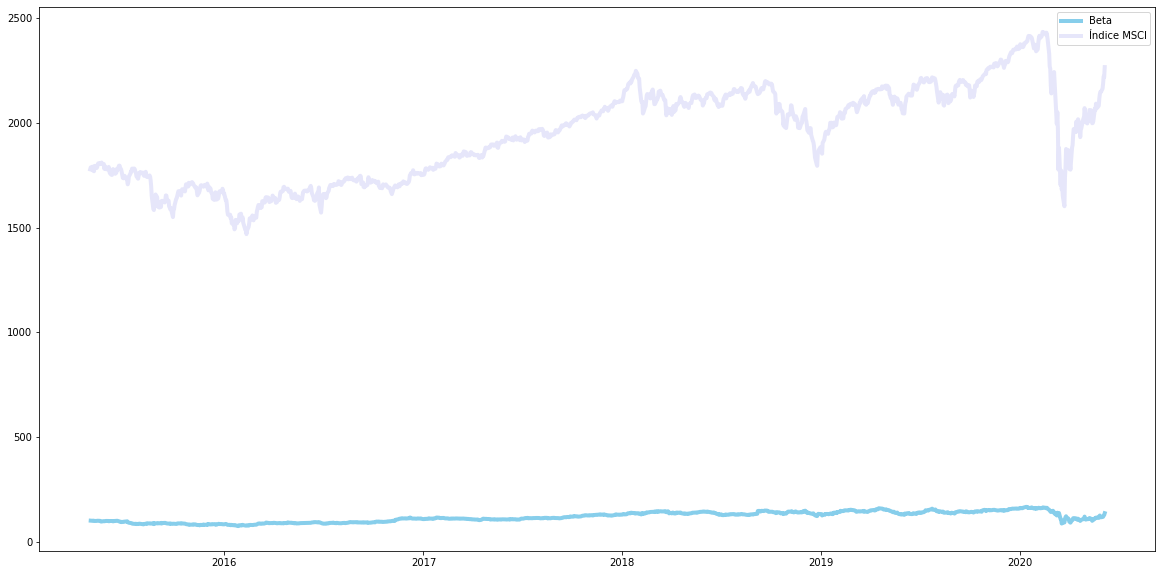

In [19]:
plt.figure(figsize=(20,10))
plt.plot(final.index, final['Beta'], marker='', markerfacecolor='blue', markersize=12, color='skyblue', 
         linewidth=4, label ='Beta')
plt.plot(indice["MSCI WORLD"], marker='', markerfacecolor='lavender', markersize=12, color='lavender', 
         linewidth=4, label ='Índice MSCI')
plt.legend()

Podemos concluir que la selección de pesos para los datos en cuestión es correcta. Además, observamos que la estrategia es neutral a mercado. 

In [20]:
final.to_csv('Estrategia_Low_Beta_final.csv')